Umbralizacion con la tecnica de ISODATA

Text(0.5, 1.0, 'imagen con el umbral de isodata , 132.0')

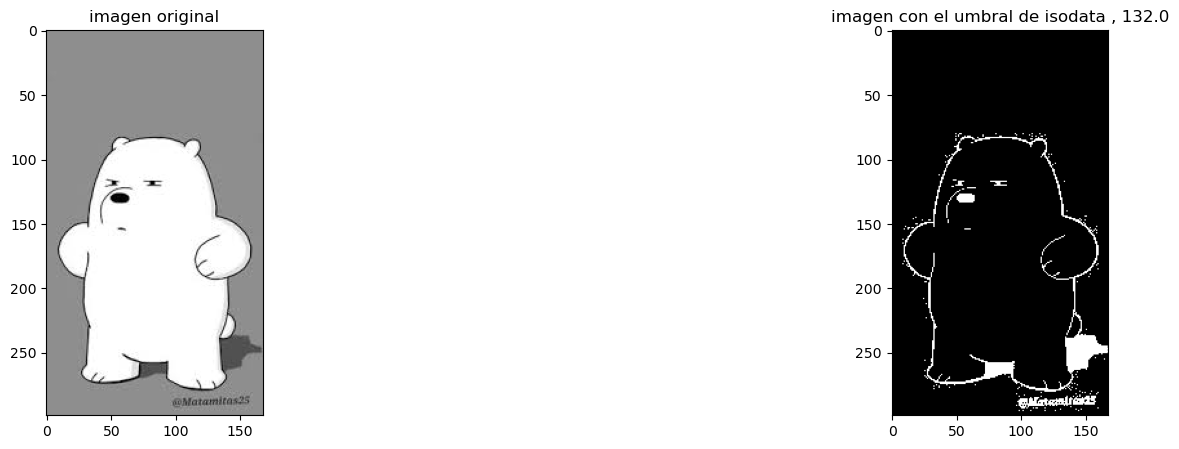

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def isodata(img):
    umbral = 128
    while True:

        grupo1=img[img<=umbral]
        grupo2=img[img>=umbral]

        mediaG1=np.mean(grupo1)
        mediaG2=np.mean(grupo2)

        umbralNuevo=(mediaG1+mediaG2)/2
        if abs(umbralNuevo-umbral)<0.5:
            break
        umbral=umbralNuevo
    return umbral

path="../imagenes/polarOriginal.jpg"
imagen =cv2.imread(path,0)

umbral_isodata=isodata(imagen)

_,imagen_isodata=cv2.threshold(imagen,umbral_isodata,255,cv2.THRESH_BINARY_INV)

fig,axs=plt.subplots(1,2,figsize=(20,5))

axs[0].imshow(imagen,cmap='gray')
axs[0].set_title('imagen original')

axs[1].imshow(imagen_isodata,cmap='gray')
axs[1].set_title(f'imagen con el umbral de isodata , {_}')

Umbralizacion tecnica de picos

Text(0.5, 1.0, 'imagen dos picos')

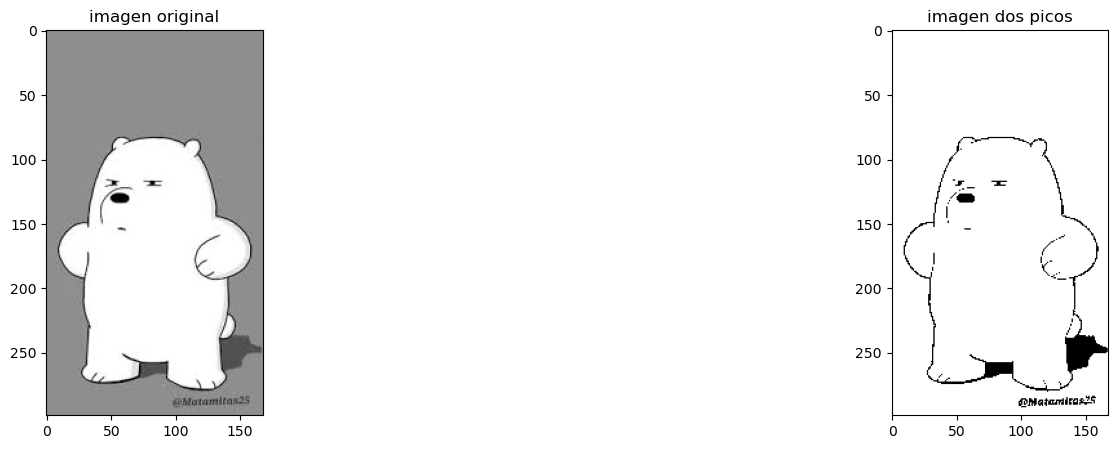

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dos_picos(img):
    
    hist=cv2.calcHist([imagen],[0],None,[256],[0,256])
    pico=np.array(hist)
    pico=pico.flatten()
    pico_dif=np.diff(pico)
    pico_mayor=np.argmax(pico_dif[:128])
    pico_menor=np.argmax(pico_dif[128:])+128

    umbral_2picos=int((pico_mayor+pico_menor)/2)
    return umbral_2picos


imagen=cv2.imread(path,0)

umbral_2pic=dos_picos(imagen)

_,imagen_2picos=cv2.threshold(imagen,umbral_2pic,255,cv2.THRESH_BINARY)

fig,axs=plt.subplots(1,2,figsize=(20,5))

axs[0].imshow(imagen,cmap='gray')
axs[0].set_title("imagen original")

axs[1].imshow(imagen_2picos,cmap='gray')
axs[1].set_title("imagen dos picos")

medoto de otsu

Text(0.5, 1.0, 'imagen con umbral de otsu')

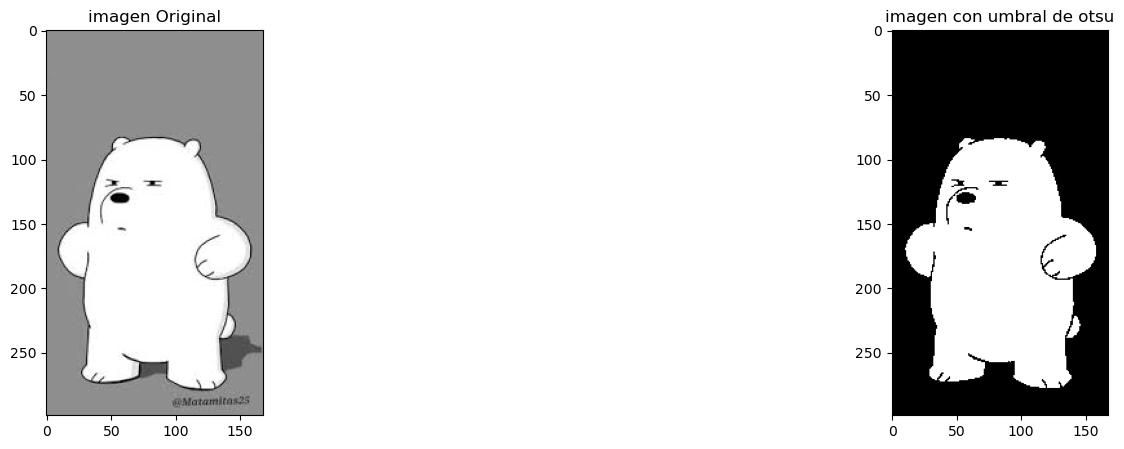

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen=cv2.imread(path,0)
_,imagen_otsu=cv2.threshold(imagen,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

umbral_imagen = np. where(imagen>imagen_otsu,255,0).astype(np.uint8)

fig,axs = plt.subplots(1,2,figsize=(20,5))

axs[0].imshow(imagen,cmap='gray')
axs[0].set_title('imagen Original')

axs[1].imshow(imagen_otsu,cmap='gray')
axs[1].set_title('imagen con umbral de otsu')

Umbralizacion VARIABLE-Particion de una imagen

(299, 168)


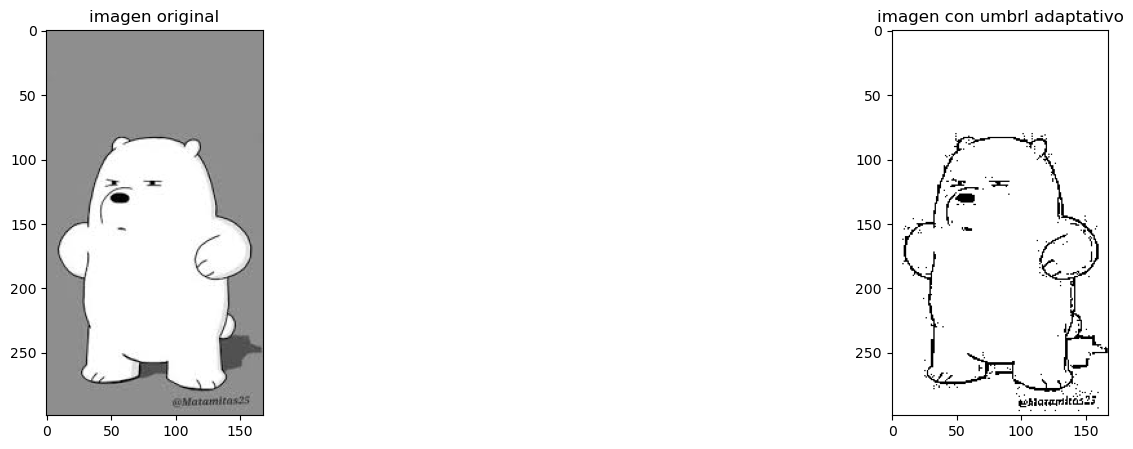

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def variable_umb_block(imagen,tam_block,c):
    umbral_img=np.zeros_like(imagen)
    for y in range(0,imagen.shape[0],tam_block):
        for x in range(0,imagen.shape[1],tam_block):
            bloque=imagen[y:y+tam_block,x:x+tam_block]
            bloque_media=np.mean(bloque)
            umbral_adap=bloque_media-c
            umbral_img[y:y+tam_block,x:x+tam_block]=(bloque>umbral_adap)*255
    return umbral_img

ima=cv2.imread(path,0)
tam_block=5
c=10
umbral_img_adap=variable_umb_block(ima,tam_block,c)

fig,axs=plt.subplots(1,2,figsize=(20,5))

axs[0].imshow(ima,cmap='gray')
axs[0].set_title("imagen original")

axs[1].imshow(umbral_img_adap,cmap='gray')
axs[1].set_title("imagen con umbrl adaptativo")
print(ima.shape)


Con desviacion

(299, 168)


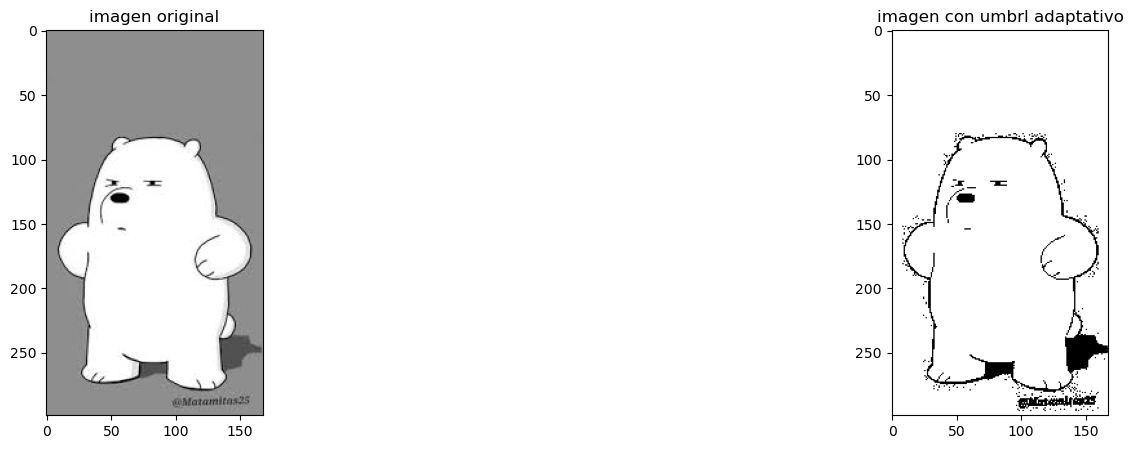

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def umbral_var2(img,tam_block,ajuste):
    umbral_img=np.zeros_like(img)
    for y in range(0,img.shape[0],tam_block):
        for x in range(0,img.shape[1],tam_block):
            bloque=img[y:y+tam_block,x:x+tam_block]
            bloque_media=np.mean(bloque)
            des=np.std(bloque)
            umbral_adap=bloque_media-(ajuste*des)
            umbral_img[y:y+tam_block,x:x+tam_block]=(bloque>umbral_adap)*255
        return umbral_img

imagen=cv2.imread(path,0)
tam_block=300
ajuste=0.8
umbral_=umbral_var2(imagen,tam_block,ajuste)

fig,axs=plt.subplots(1,2,figsize=(20,5))

axs[0].imshow(imagen,cmap='gray')
axs[0].set_title("imagen original")

axs[1].imshow(umbral_,cmap='gray')
axs[1].set_title("imagen con umbrl adaptativo")
print(imagen.shape)


ADAPTATIV CON VENTANA

(299, 168)


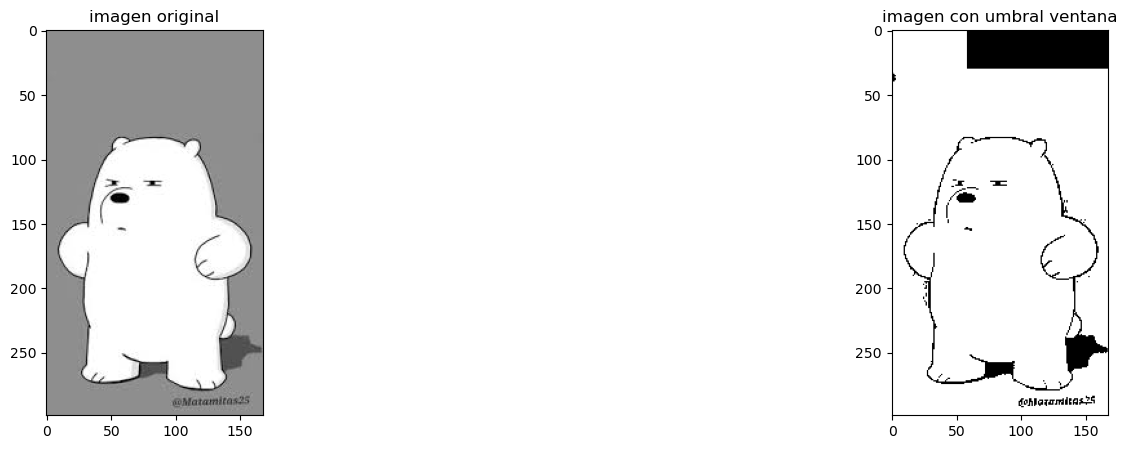

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ventana(img,ventana,factor):
    umbral_img=np.zeros_like(img)
    pad=ventana//2
    padd_img=cv2.copyMakeBorder(ima,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
    for y in range(0,img.shape[0]):
        for x in range(0,img.shape[1]):
            ventana1=padd_img[y:y+ventana,x:x+ventana]
            media=np.mean(ventana1)
            distribucion=np.std(ventana1)
            umbral=media-(factor*distribucion)
            umbral_img[y,x]=255 if img[y,x]>umbral else 0
    return umbral_img


imagen=cv2.imread(path,0)
tam_block=101 #simepre impar
c=1
umbral_ventana=ventana(imagen,tam_block,c)

fig,axs=plt.subplots(1,2,figsize=(20,5))

axs[0].imshow(imagen,cmap='gray')
axs[0].set_title("imagen original")

axs[1].imshow(umbral_ventana,cmap='gray')
axs[1].set_title("imagen con umbral ventana")
print(imagen.shape)

con libreria cv2

Text(0.5, 1.0, 'imagen con umbral adaptativo')

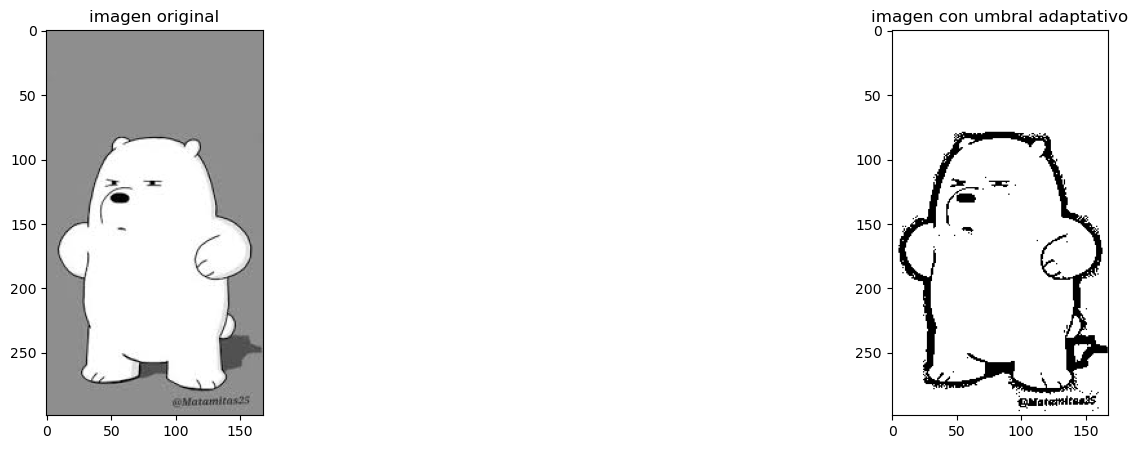

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imge=cv2.imread(path,0)
ventana=15
factor=5
imagen_umbral=cv2.adaptiveThreshold(imge,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,ventana,factor)

fig,axs=plt.subplots(1,2,figsize=(20,5))

axs[0].imshow(imge,cmap='gray')
axs[0].set_title("imagen original")

axs[1].imshow(imagen_umbral,cmap='gray')
axs[1].set_title("imagen con umbral adaptativo")
#print(axs.on)